Group Members: Marisa Long and Anna Schoeny\
[Link to Github](https://marisalong.github.io)
# Exploratory Analysis of Alzheimer's Disease Datasets

## **Collaboration Plan**
Our team's meeting plan is to collaborate together once a week to keep up with the milestones for the final project. We plan to ideally meet in person late morning/early afternoon on Sundays. Meeting in person once a week will ensure that we are able to adequately communicate and delegate what each of us are working on and assist each other as necessary. We created a shared Github repository as our means of maintaining version control and collaboration for the project. The project board within our repository includes our to-do tasks so we are able to track our progress. 

## **Discussion of Datasets**
Our team is interested in working with datasets related to Alzheimer's disease measuring features of patients such as clinical dimension rating, years of education, normalized whole brain volume, age, socioeconomic status, and more. We are particularly interested in working with datasets relating to Alzheimer's because our families have both been personally impacted by the disease. We are currently considering working with two particular datasets that we have uncovered in our search. 

The first dataset that we are considering working with is [Alzheimer's Disease and Healthy Aging Indicators: Cognitive Decline](https://chronicdata.cdc.gov/Healthy-Aging/Alzheimer-s-Disease-and-Healthy-Aging-Indicators-C/jhd5-u276) from the [Centers for Disease Control](https://www.cdc.gov/aging/index.html) (CDC). This dataset is a filtered version of a larger [Behavioral Risk Factor Surveillance System](https://www.cdc.gov/brfss/index.html) (BRFSS) dataset to include only information on mental decline relevant to our project. We are interested in using this dataset because the CDC has access to a large volume of data related to Alzheimer's, which will allow us to have a  broad view of the features we might be able to work with as we narrow down our project scope. Another interesting aspect of this dataset is that the CDC has recorded information regarding both healthy individuals and diseased individuals. Using this data, we are hoping to be able to answer questions regarding health-related behaviors, chronic health dianoses, and the use of various health-related services as broken down by age, gender, race, and state, to name a few. 
For example:
- Is gender a predictive feature of Alzheimer's disease in older adults?


The second dataset that we are considering working with is [MRI and Alzheimer's](https://www.kaggle.com/datasets/jboysen/mri-and-alzheimers) taken from the [Open Access Series of Imaging Studies (OASIS)](http://www.oasis-brains.org/). This dataset includes MRI comparisons of adults with Alzheimer's and healthy adults. This dataset was initially interesting to our team because the this dataset has a high data usability score as assigned by Kaggle, which represents user ratings on the documentation of the data. This high score indicates that the data is in a state ready for our analysis. This dataset also includes both cross-sectional and longitudinal MRI data. The cross-sectional data highlights 416 subjects ranging from age 18 to 96 and details 3 to 4 MRI scans for each subject. Approximately $1\over4$ of the subjects had been diagnosed with Alzheimer's disease. The longitudinal data follows the same sample of 150 subjects aged 60 to 96. These subjects were scanned two or more times with at least a year between imaging sessions. 64 of the subjects were diagnosed with Alzheimer's disease by the time of the first scan with an additional 14 diagnosed at one of the later scan visits. Using this data, we are hoping to be able to answer questions regarding the ability to predict dementia in patients based on features such as socioeconomic status or education. For example:
- Was education a predictive feature for individuals who had dementia at the time of their first scan or who were diagnosed with dementia over the course of the study? 
- Was does scioeconomic a predictor for Alhziemer's?

#### Overarching Goal

Our hope is that through asking questions of the data, we will be able to clearly display risk factors for dementia. We are especially interested in looking into the relationships between gender, age, education, and socioeconomic status and the onset of Alhzeimer's.

## Basic ETL (Extract, Transform, and Load) and EDA (Exploratory Data Analysis)
#### REMINDER: Make sure to **PULL** before working. Also, **PUSH** work when you do something meaningful!

In [50]:
# this is just to double check that you are in the correct directory
!pwd

/Users/marisamlong/Desktop/Tulane/cmps3160/_finaltutorial/marisalong.github.io


In [51]:
# importing necessary libraries for the analyzing the data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Dataset 1: Alzheimer's Disease and Healthy Aging Indicators: Cognitive Decline 
Data from the CDC's BRFSS

In [52]:
# Read in the data 
df_alhz_aging = pd.read_csv('./data/Alzheimer_s_Disease_and_Healthy_Aging_Indicators__Cognitive_Decline.csv')

/var/folders/yl/75wgtm7150z47_cyg623kjxh0000gn/T/ipykernel_60832/2212120155.py:2: DtypeWarning: Columns (16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df_alhz_aging = pd.read_csv('./data/Alzheimer_s_Disease_and_Healthy_Aging_Indicators__Cognitive_Decline.csv')


#### Cleaning Dataset 1 for Tidy Data:

To transform our data according to the Tidy Data principles we've learned in this course, we needed to fix the issue with columns 17 and 18 having inconsistent dtypes. We cast all values to floats (or np.nan). There were a number of columns that did not actually have any data stored in them, so we decided to get rid of those columns to clean up the dataframe further. Another issue we have had in terms of tidy data was that many of the columns were redundant and had the same information as another column. For the purposes of our project, we got rid of the columns we deemed redundant. Another example is that 'StratificationCategory2' included both Gender and Race/Ethnicity, so we wanted to separate these into two columns 'Gender' and 'Race/Ethnicity'. 

In [53]:
#Data Cleaning: Ensuring that columns 17 and 18 are only one type (float)

# Cleaning column 18 to make all data types floats
df_alhz_aging["High_Confidence_Limit"] = df_alhz_aging["High_Confidence_Limit"].replace('.', np.nan)
df_alhz_aging["High_Confidence_Limit"] = df_alhz_aging["High_Confidence_Limit"].fillna(-1)
df_alhz_aging["High_Confidence_Limit"] = df_alhz_aging["High_Confidence_Limit"].astype(float)
df_alhz_aging["High_Confidence_Limit"] = df_alhz_aging["High_Confidence_Limit"].replace(-1, np.nan)

# Cleaning column 17 to make all data types floats
df_alhz_aging["Low_Confidence_Limit"] = df_alhz_aging["Low_Confidence_Limit"].replace('.', np.nan)
df_alhz_aging["Low_Confidence_Limit"] = df_alhz_aging["Low_Confidence_Limit"].fillna(-1)
df_alhz_aging["Low_Confidence_Limit"] = df_alhz_aging["Low_Confidence_Limit"].astype(float)
df_alhz_aging["Low_Confidence_Limit"] = df_alhz_aging["Low_Confidence_Limit"].replace(-1, np.nan)

In [54]:
# Data Cleaning: Removing empty and redundant columns to clean up dataframe 
df_alhz_aging.drop(['Response','Sample_Size', 'StratificationCategory3', 'Stratification3', 'ResponseID', 
                    'StratificationCategoryID3', 'StratificationID3', 'StratificationCategoryID1', 'Report', 'DataValueTypeID', 'Data_Value_Type',
                   'Data_Value_Alt', 'Data_Value_Footnote_Symbol', 'StratificationID1', 'StratificationCategoryID2', 'StratificationID2'], axis=1, inplace=True)

In [55]:
# Data Cleaning: Separating 'Stratification2' and 'StratificationCategory2' 
# into two columns for 'Race/Ethnicity' and 'Gender' and then delete original columns

df_alhz_aging['Gender'] = df_alhz_aging['Stratification2'].map({
    'Female': 'Female',
    'Male': 'Male'
})

df_alhz_aging['Race/Ethnicity'] = df_alhz_aging['Stratification2'].map({
    'White, non-Hispanic': 'White, non-Hispanic',
    'Hispanic': 'Hispanic',
    'Native Am/Alaskan Native': 'Native Am/Alaskan Native',
    'Black, non-Hispanic': 'Black, non-Hispanic',
    'Asian/Pacific Islander': 'Asian/Pacific Islander'
})

# Drop the original columns
df_alhz_aging.drop(['Stratification2', 'StratificationCategory2'], axis=1, inplace=True)


In [56]:
# Data Cleaning: Repeat above process but tidy up data from 'Stratification1' as well - turn into 'Age Group' column
df_alhz_aging['Age Group'] = df_alhz_aging['Stratification1'].map({
    'Overall': 'Overall',
    '50-64 years': '50-64 years',
    '65 years or older': '65 years or older'
})

# Drop the original columns 
df_alhz_aging.drop(['Stratification1', 'StratificationCategory1'], axis=1, inplace=True)

In [57]:
# Quick peak at dataframe
df_alhz_aging.head() 

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,ClassID,TopicID,QuestionID,LocationID,Gender,Race/Ethnicity,Age Group
0,2015,2020,AL,Alabama,BRFSS,Cognitive Decline,Talked with health care professional about sub...,Percentage of older adults with subjective cog...,%,NaN,Sample size of denominator and/or age group fo...,NaN,NaN,C06,TCC04,Q42,1,NaN,Native Am/Alaskan Native,65 years or older
1,2015,2015,AL,Alabama,BRFSS,Cognitive Decline,Need assistance with day-to-day activities bec...,Percentage of older adults who reported that a...,%,41.8,NaN,33.6,50.4,C06,TCC03,Q41,1,NaN,"White, non-Hispanic",50-64 years
2,2015,2020,AL,Alabama,BRFSS,Cognitive Decline,Need assistance with day-to-day activities bec...,Percentage of older adults who reported that a...,%,39.3,NaN,30.5,48.7,C06,TCC03,Q41,1,Male,NaN,Overall
3,2020,2020,AK,Alaska,BRFSS,Cognitive Decline,Functional difficulties associated with subjec...,Percentage of older adults who reported subjec...,%,NaN,Sample size of denominator and/or age group fo...,NaN,NaN,C06,TCC02,Q31,2,NaN,Asian/Pacific Islander,Overall
4,2020,2020,AK,Alaska,BRFSS,Cognitive Decline,Need assistance with day-to-day activities bec...,Percentage of older adults who reported that a...,%,NaN,No Data Available,NaN,NaN,C06,TCC03,Q41,2,NaN,Asian/Pacific Islander,50-64 years


Here are the datatypes in this dataframe:

In [65]:
df_alhz_aging.dtypes

YearStart                  int64
YearEnd                    int64
LocationAbbr              object
LocationDesc              object
Datasource                object
Class                     object
Topic                     object
Question                  object
Data_Value_Unit           object
Data_Value               float64
Data_Value_Footnote       object
Low_Confidence_Limit     float64
High_Confidence_Limit    float64
ClassID                   object
TopicID                   object
QuestionID                object
LocationID                 int64
Gender                    object
Race/Ethnicity            object
Age Group                 object
dtype: object

### Questions for dataset 1:

#### Over how many years did an observation take place on average? 

In [58]:
(df_alhz_aging['YearEnd']-df_alhz_aging['YearStart']).mean()

1.3276850886339937

From this statistic, we can see that most of the groups were studied over a relatively short period of time (average 1.3 years). This is relevant because what it could inform us of what conditions have changed for participants over time. Unfortunately, with the way the data is grouped, we are unable to see if this pertains to the length of time an individual was studied or if everyone in the group was observed once across this time period.

#### How does the distribution of older adults who reported that as a result of subjective cognitive decline or memory loss that they need assistance with day-to-day activities differ by race/ethnicity? 

<AxesSubplot: xlabel='Race/Ethnicity', ylabel='Frequency'>

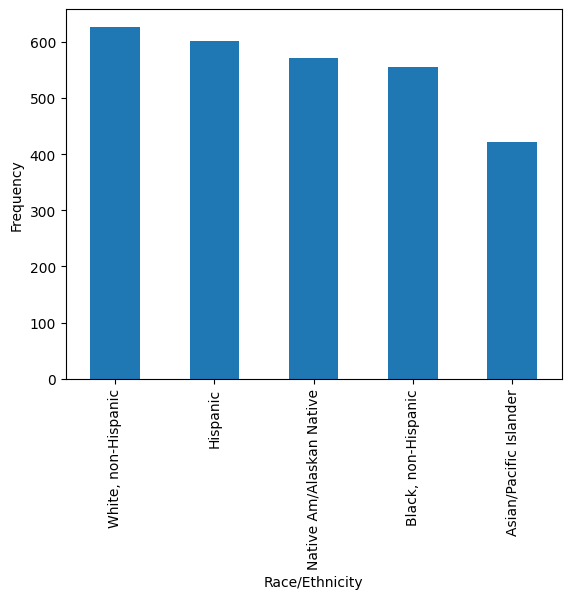

In [59]:
df_Q41 = df_alhz_aging[df_alhz_aging['QuestionID']=='Q41']
df_Q41['Race/Ethnicity'].value_counts().plot.bar(xlabel='Race/Ethnicity', ylabel='Frequency')

This distribution reveals that White, non-hispanic individuals were the most frequent respondents to the survey question about reports of needing assistance due to cognitive decline. This may be a good starting point for further investigation, but it would be necessary to know the distribution of data by race/ethnicity of the entire survey in general to take any real meaning out of this distribution. 

### Dataset 2: MRI and Alzheimer's
Data from OASIS project

In [60]:
# Read in the longitudinal data and take a peek
df_alhz_long = pd.read_csv('./data/oasis_longitudinal.csv')
df_alhz_long.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


Here are the datatypes for this dataframe:

In [61]:
df_alhz_long.dtypes

Subject ID     object
MRI ID         object
Group          object
Visit           int64
MR Delay        int64
M/F            object
Hand           object
Age             int64
EDUC            int64
SES           float64
MMSE          float64
CDR           float64
eTIV            int64
nWBV          float64
ASF           float64
dtype: object

In [62]:
# Looking at what type of patients make up this dataset

df_alhz_long['Group'].value_counts()

Nondemented    190
Demented       146
Converted       37
Name: Group, dtype: int64

### Questions for Dataset 2(a)

#### What is the average level of education (variable 'EDUC') of demented vs non-demented vs converted individuals?

In [15]:
# Average Education level for demented individuals
df_alhz_long[df_alhz_long.Group == "Demented"].EDUC.mean()

13.67123287671233

In [16]:
# Average Education level for nondemented individuals
df_alhz_long[df_alhz_long.Group == "Nondemented"].EDUC.mean()

15.142105263157895

In [17]:
# Average Education level for converted individuals
df_alhz_long[df_alhz_long.Group == "Converted"].EDUC.mean()

15.45945945945946

One hypothesis we have based on this brief summary of education level is that education slows cognitive decline. This is suppored by the data above, where demented individuals have and average of 13.7 years, nondemented individuals have an average of 15.1 years, and converted individuals have 15.5 years. Looking at education differences among clinically demented vs nondemented individuals will help us determine how strongly education level may predict Alhzeimer's.

#### How are education and socioeconomic status related in this sample?

In [18]:
df_alhz_long["EDUC"].corr(df_alhz_long["SES"])

-0.7226472777909835

At first glance, a strong negative correlation between education level and socioeconomic status was suprising. However, when we read the publication that came out alongside this dataset, they authors explained that 'SES' is ranked using the Hollingshead Index of Social Position and has 1 being the highest status, where 5 is the lowest. Therefore, this statistic shows that individuals from a higher socioeconomic status were likely to recieve more education than those of lower socioeconomic statuses. Through our further exploration, we hope to uncover the relationship between socioeconomic status, education, and dementia.

#### How old were people in this dataset when they had their first MRI scan for dementia?

In [19]:
# Filtering data to get just the first visit
first_visit = df_alhz_long[df_alhz_long.Visit == 1]

#Take mean of age of filtered data
first_visit.Age.mean()

75.44666666666667

In [20]:
# Take standard deviation of age of filtered data
first_visit.Age.std()

7.545421000584566

The mean age of patients on their first visit was 74.4 years old, and this dataset had a standard deviation of 7.5. This shows that this dataset focuses heavily on Alhzeimer's and dementia in older individuals, rather than also considering early onset Alzheimer's. Looking at age allows us to understand the timeframe for dementia onset. 

#### How does the number of females vs males with dementia compare in this dataset?

M/F
F    AxesSubplot(0.125,0.125;0.775x0.755)
M    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

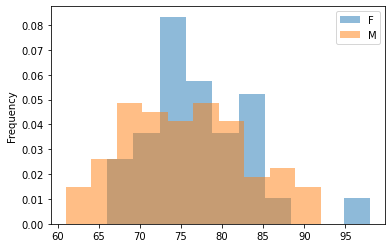

In [21]:
# Creating new dataframe with ages in accending order
age_accending_dementia = df_alhz_long.sort_values('Age')
age_accending_dementia = age_accending_dementia[age_accending_dementia.Group == "Demented"]
age_accending_dementia.groupby("M/F").Age.plot.hist(alpha=.5, density=True, legend=True, xlabel='Age of Indv. with Dementia')

Compared to the male data, the female data appears to be more right-skewed. This allows us to hypothesize that women on average are older than men when they are affected by Alhzeimer's. 

This dataset also includes cross-sectional data from the same research lab, which is included below:

In [22]:
# Read in the cross-sectional data and take a peek
df_alhz_cross = pd.read_csv('./data/oasis_cross-sectional.csv')
df_alhz_cross.head()

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN


In [23]:
df_alhz_cross.dtypes

ID        object
M/F       object
Hand      object
Age        int64
Educ     float64
SES      float64
MMSE     float64
CDR      float64
eTIV       int64
nWBV     float64
ASF      float64
Delay    float64
dtype: object

Note: This the cross-sectional data does not have a group column that classifies the patients as demented, nondemented or converted like the longitudinal dataset does. However, they still include the Clinical Dementia Rating (CDR) that describes the level of dementia. According to the CDR, these are the classifications:
0 = no dementia, 
0.5 = very mild AD, 
1 = mild AD, 
2 = moderate AD.

To make the data more easily comparable to the longitudinal data, we used this quantitative variable to create a categorical variable with the three states.  

In [24]:
#Create a Group variable for cross-sectional data
df_alhz_cross['Group'] = df_alhz_cross['CDR'].map({
    0.0: 'Nondemented',
    0.5: 'Demented',
    1.0: 'Demented',
    1.5:'Demented',
    2.0:'Demented'
})

# Look at how many individuals fall into each category
df_alhz_cross['Group'].value_counts()

Nondemented    135
Demented       100
Name: Group, dtype: int64

#### What is the average level of education (variable 'EDUC') of demented vs non-demented vs converted individuals?

In [25]:
# Average Education level for demented individuals
df_alhz_cross[df_alhz_cross.Group == "Demented"].Educ.mean()

2.82

In [26]:
# Average Education level for nondemented individuals
df_alhz_cross[df_alhz_cross.Group == "Nondemented"].Educ.mean()

3.4444444444444446

#### How are education and socioeconomic status related in this sample?

In [27]:
df_alhz_cross["Educ"].corr(df_alhz_cross["SES"])

-0.7423610355426756

Similar to the longitudinal data, this statistic shows that individuals from a higher socioeconomic status were likely to recieve more education than those of lower socioeconomic statuses. The correlation is also very similar, with it being -0.74 in the cross-sectional data compared to -0.72 in the longitudinal data. 

#### How old were people in this dataset when they had their MRI to scan for dementia?

In [28]:
#Take mean of age
df_alhz_cross.Age.mean()

51.357798165137616

In [29]:
# Take standard deviation of age
df_alhz_cross.Age.std()

25.269862268101562

The mean age of patients when they got their MRI scan was 51.3 years old, which is much younger than the previous dataset. This dataset also had a much bigger spread in regards to age, with the standard deviation of 25.3. This tells us that the cross-sectional dataset could contain cases of early onset Alzheimer's. 

#### How does the number of females vs males with dementia compare in this dataset?

M/F
F    AxesSubplot(0.125,0.125;0.775x0.755)
M    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

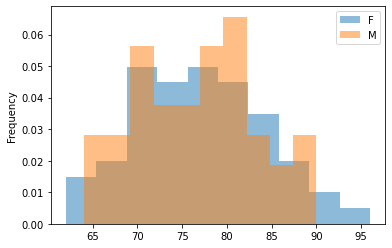

In [30]:
# Creating new dataframe with ages in accending order
age_accending_cross = df_alhz_cross.sort_values('Age')
age_accending = age_accending_cross[age_accending_cross.Group == "Demented"]
age_accending.groupby("M/F").Age.plot.hist(alpha=.5, density=True, legend=True, xlabel='Age of Indv. with Dementia')

From this graphic, we see that females have a wider range of ages.

## Challenges and Final Thoughts


After out initial exploration of the data in these datasets, we have determined that we will continue to use the second two data sets and omit the CDC dataset. Unfortunately, after cleaning the data, we found that the observations were not descriptive enought to provide useful insight towards our analysis goals. 

#### Challenges with Dataset 1: Un-Tidy data

1. ***Columns containing inconsistent data types:*** As soon as we loaded in the data, we saw a warning for columns 17 and 18 that warned of columns with inconsitent dtypes. To solve this, we took a look at the data to see what data types did exist. What we found was there were ints, floats, np.nan, and columns containing the string '.' in each column. We the replaced the '.' with np.nan to keep missing data consistent. Then, we gave np.nan the placeholder variable of -1 so that we could force the data to be of type float. Once we changed the data type of all entries to a float, we then replaced -1 with np.nan to acknowledge the missing data.
2. ***Columns containing multiple variables:*** The data in the original columns 'Stratification1', 'StratificationCategory1', 'Stratification2' and 'StratificationCategory2' all contained multiple variables. 'Stratification1' contained what should have been the column title for 'StratificationCategory1', which held information describing the age group. To fix this, we created a new column called 'Age Group' and populated it with information from 'StratificationCategory1'. We then dropped the two original columns. Similarly, 'Stratification2' held the titles 'Gender' or 'Race/Ethnicity' to explain the information held in column 'StratificationCategory2'. To solve this, we created a one column for a race and one for gender and then mapped the appropriate data to those columns. We then dropped the original columns.
3. ***Empty Columns:*** There were several columns that were empty, so we dropped them from the dataframe.
4. ***Complicated observations (rows):*** After cleaning the data, when trying to interpret what was left, we found that observations didn't make up individuals, but rather a group of individuals that were observed for specified years from specified states. This made the data much more difficult to aggregate, because you can only pull out broad generalizations from these observations. Additionally, the 'Response' column in all of the observations did not contain data. Therefore, this dataset does not have much we can use.

#### Chalenges with Dataset 2: Comparisions Across Datasets

1. ***Different Columns (Variables):*** The longitudinal data and cross-sectional data contained slightly different varibles from one another. For example, 'Group' only existed in one dataframe, so we had to map the Clinical Dementia rating for each patient found in the cross-sectional data to their correpsonding group. 
2. ***'EDUC' Ambiguity:*** In the longitudinal data, the paper that was published alongside the dataset clearly states that Education Level means the number of years in formal education for that individual. However, in the cross-sectional data, the 'Educ' numbers are suspiciously low for being total years in formal education, education may be measured differently there. We must continue to dig into what the connection between these two variables may be.

####  Plan Moving Forward and What We Still Need

From here, we plan to focus on the the second dataset, which includes two dataframes of cross-sectional and longitudinal data. To supplement this data, we would like to find a dataset that contains more information on the relationships between socioeconomic status and education (perhaps breaks down this relationship into finer detail). We also want to see if there are any gendered differences in dementia onset. We can begin doing this at brain volume, although it would be helpful to have a dataset that included white matter mass.

##### Citations

Alzheimer’s disease and healthy aging indicators: Cognitive decline | Chronic disease and health promotion data & indicators. (n.d.).https://chronicdata.cdc.gov/Healthy-Aging/Alzheimer-s-Disease-and-Healthy-Aging-Indicators-C/jhd5-u276

Brfss. (2022, August 29). https://www.cdc.gov/brfss/index.html

Daniel S. Marcus, Anthony F. Fotenos, John G. Csernansky, John C. Morris, Randy L. Buckner; Open Access Series of Imaging Studies: Longitudinal MRI Data in Nondemented and Demented Older Adults. J Cogn Neurosci 2010; 22 (12): 2677–2684. https://direct.mit.edu/jocn/article/22/12/2677/4983/Open-Access-Series-of-Imaging-Studies-Longitudinal

Marcus, D. S., Wang, T. H., Parker, J., Csernansky, J. G., Morris, J. C., & Buckner, R. L. (2007). Open access series of imaging studies (Oasis): Cross-sectional mri data in young, middle aged, nondemented, and demented older adults. Journal of Cognitive Neuroscience, 19(9), 1498–1507. https://doi.org/10.1162/jocn.2007.19.9.1498

Mri and alzheimers. (n.d.). https://www.kaggle.com/datasets/jboysen/mri-and-alzheimers


